In [1]:
from sklearn import datasets
boston = datasets.load_boston()

C:\Users\meuch\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\meuch\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
X = boston.data
y = boston.target

# K Fold

In [3]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)

for train_index, test_index in kf.split(X):
    print("TRAIN - ",len(train_index))
    print("TEST - ",len(test_index))

TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50


In [9]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=10)
lasso_regressor = Lasso()
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):
    lasso_regressor.fit(X[train_index], y[train_index])
    ridge_regressor.fit(X[train_index], y[train_index])
    
    lasso_mse.append(mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index])))
    ridge_mse.append(mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index])))
    
lasso_mse,ridge_mse

([11.759048867453082,
  17.872185432040016,
  10.525046734045063,
  60.79224355281783,
  46.77806853559038,
  40.75196076536371,
  17.305620050031678,
  102.67754279413444,
  22.873183401637096,
  13.305945749909915],
 [9.317663152305862,
  12.608068970543314,
  10.798594344483107,
  36.6093647973596,
  29.621092118832138,
  18.625981339411172,
  9.46641895863488,
  168.49831116712318,
  33.79749469013651,
  11.439472553763219])

In [32]:
# 위의 코드를 cross_val_score를 이용하여 간단하게 풀어보자
# Train을 넣지않고 원래의 값을 넣어준다.
from sklearn.model_selection import cross_val_score
import numpy as np

lasso_regressor = Lasso(warm_start=True)
reige_regressor = Ridge()

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=10, scoring = 'neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_regressor, X, y, cv=10, scoring = 'neg_mean_squared_error')

lasso_scores, ridge_scores

(array([ -11.75904887,  -17.87218543,  -10.52504673,  -60.79224355,
         -46.77806854,  -40.75196077,  -17.30562005, -102.67754279,
         -22.8731834 ,  -13.30594575]),
 array([  -9.31766315,  -12.60806897,  -10.79859434,  -36.6093648 ,
         -29.62109212,  -18.62598134,   -9.46641896, -168.49831117,
         -33.79749469,  -11.43947255]))

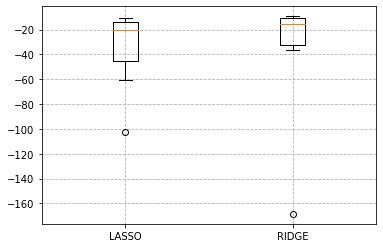

In [33]:
import matplotlib.pyplot as plt
labels=["LASSO", "RIDGE"]
plt.boxplot((lasso_scores, ridge_scores), labels=labels)
plt.grid(linestyle="--")

# LeaveOneOut

#### 잘 쓰지 않는다

In [27]:
from sklearn.model_selection import LeaveOneOut

test = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(test):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [28]:
loo = LeaveOneOut()
    
lasso_scores = cross_val_score(lasso_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.409266762049338, -23.862836317209954)

In [29]:
lasso_scores = cross_val_score(
    lasso_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(
    ridge_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

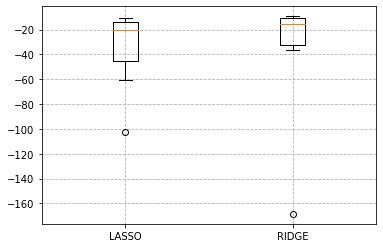

In [30]:
import matplotlib.pyplot as plt
labels=["LASSO", "RIDGE"]
plt.boxplot((lasso_scores, ridge_scores), labels=labels)
plt.grid(linestyle="--")

## 실제로는 validation set을 만들어서 하는 경우는 거의 없지만. 해보기는하자

In [34]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [35]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)
X_scaled = std.transform(X)

eta0 = 0.01 
max_iter = 100

In [38]:
from sklearn.model_selection import train_test_split


X_train_dataset, X_test, y_train_dataset, y_test = train_test_split(      # 테스트 셋 0.2
            X_scaled,y, test_size=0.2, random_state=42)

sgd_regressor = SGDRegressor(
    eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")

rmse_val_score = []
rmse_train_score = []
model_list = []

X_train, X_val, y_train, y_val = train_test_split(                        # train 0.64    validation 0.16
    X_train_dataset,y_train_dataset, test_size=0.2, random_state=42)
sgd_regressor.fit(X_train,y_train)

# kf = KFold(n_splits=100, shuffle=True)
# for train_index, test_index in kf.split(X_train_dataset):

for i in range(300):

    y_pred = sgd_regressor.predict(X_train)
    y_true = y_train
    rmse_train_score.append(rmse(y_pred, y_true))

    y_pred = sgd_regressor.predict(X_val)
    y_true = y_val
    rmse_val_score.append(rmse(y_pred, y_true))
    model_list.append(sgd_regressor)

    coef = sgd_regressor.coef_.copy()
    intercept = sgd_regressor.intercept_.copy()

    sgd_regressor = SGDRegressor(
        eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")
    
    sgd_regressor.fit(X_train,y_train, coef_init=coef, intercept_init=intercept)

C:\Users\meuch\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


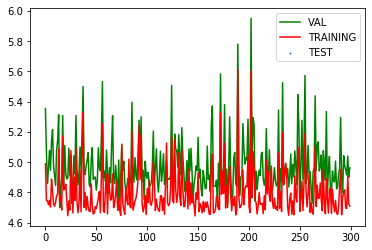

In [37]:
plt.plot(range(len(rmse_val_score)), rmse_val_score,  c="G", label="VAL")
plt.plot(range(len(rmse_train_score)), rmse_train_score,  c="r", label="TRAINING")
plt.scatter(99, rmse(y_test,sgd_regressor.predict(X_test)), s=1, label="TEST")
plt.legend()
plt.show()

In [39]:
np.argsort(rmse_val_score)

array([166, 222, 184,  76, 124, 228, 127,  41, 108,  26,  32, 279, 185,
       250, 186, 270, 233, 133,  40, 225, 241, 271, 286, 294, 256, 207,
       192, 101, 284, 277, 246, 132, 125, 155, 213,  39,  31, 189, 121,
        28, 119, 150, 174, 215, 130, 103,  27,  55, 243,  30, 211, 104,
        48, 195, 260, 182, 258, 173, 221,  98,  85, 143, 280,  42,  73,
        97, 253,  81, 169, 247,  91, 197,  51, 208, 200, 112,  93,  65,
        62,  74, 128, 216, 172, 212, 296,  17, 159,  44, 232, 113, 244,
       248, 249, 179, 223,  59, 214, 131, 163,  10, 158,  70, 255,  24,
       299, 139, 217, 288, 109, 275, 183, 287,  49,  50, 118,  13, 261,
       224, 240, 110, 283, 199, 198,  34,  88, 229,  45, 289, 122, 188,
       167, 114, 290,  96, 111,  71, 262, 134,   2, 251, 160, 151, 276,
       177,  21, 274, 285, 266, 117,  12, 254, 209, 252,  25, 136,  95,
       106,  90, 105,  46, 238, 144, 297, 231,  79, 257,  47, 264,  43,
       138, 205, 194, 245,  82, 234,  15, 201,  38,  56,  89,  2

In [40]:
rmse(y_test,sgd_regressor.predict(X_test))

5.463424473519383

In [41]:
rmse(y_test,model_list[217].predict(X_test))

5.04071817343759

In [42]:
model_list[0].coef_

array([-0.9698363 ,  0.85075614,  0.46421614,  1.03592747, -1.9645612 ,
        3.01862813,  0.14844797, -3.2927901 ,  2.16509141, -0.87255315,
       -1.80172978,  0.94667149, -3.02138792])